# Problem Statement: 
### To predict a student's chance to get admitted to a good graduation college. Also to provide the recommendations to the students to boost their profile from the factors that significantly help them increase their chance of admission.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Admission_Prediction.xlsx')

# Basic Checks

In [3]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [5]:
data.describe()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE_Score          485 non-null    float64
 2   TOEFL_Score        490 non-null    float64
 3   University_Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
data.isnull().sum()
# we identified null values

Serial No.            0
GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit       0
dtype: int64

# Exploratory Data Analysis

In [8]:
# for GRE_Score null values can be replaced by median
data['GRE_Score'] = data['GRE_Score'].replace(np.NaN,data['GRE_Score'].median())

In [9]:
# for TOEFL_Score null values can be replaced by median
data['TOEFL_Score']=data['TOEFL_Score'].replace(np.NaN,data['TOEFL_Score'].median())

In [10]:
# for University_Rating null values can be replaced by median
data['University_Rating']=data['University_Rating'].replace(np.NaN,data['University_Rating'].median())

In [11]:
data.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

<AxesSubplot:xlabel='GRE_Score', ylabel='Density'>

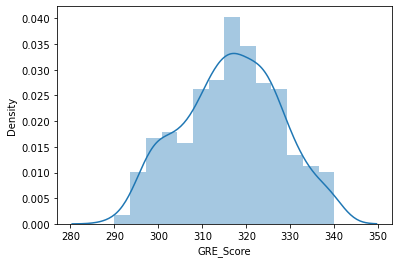

In [12]:
sns.distplot(data.GRE_Score,kde=True)

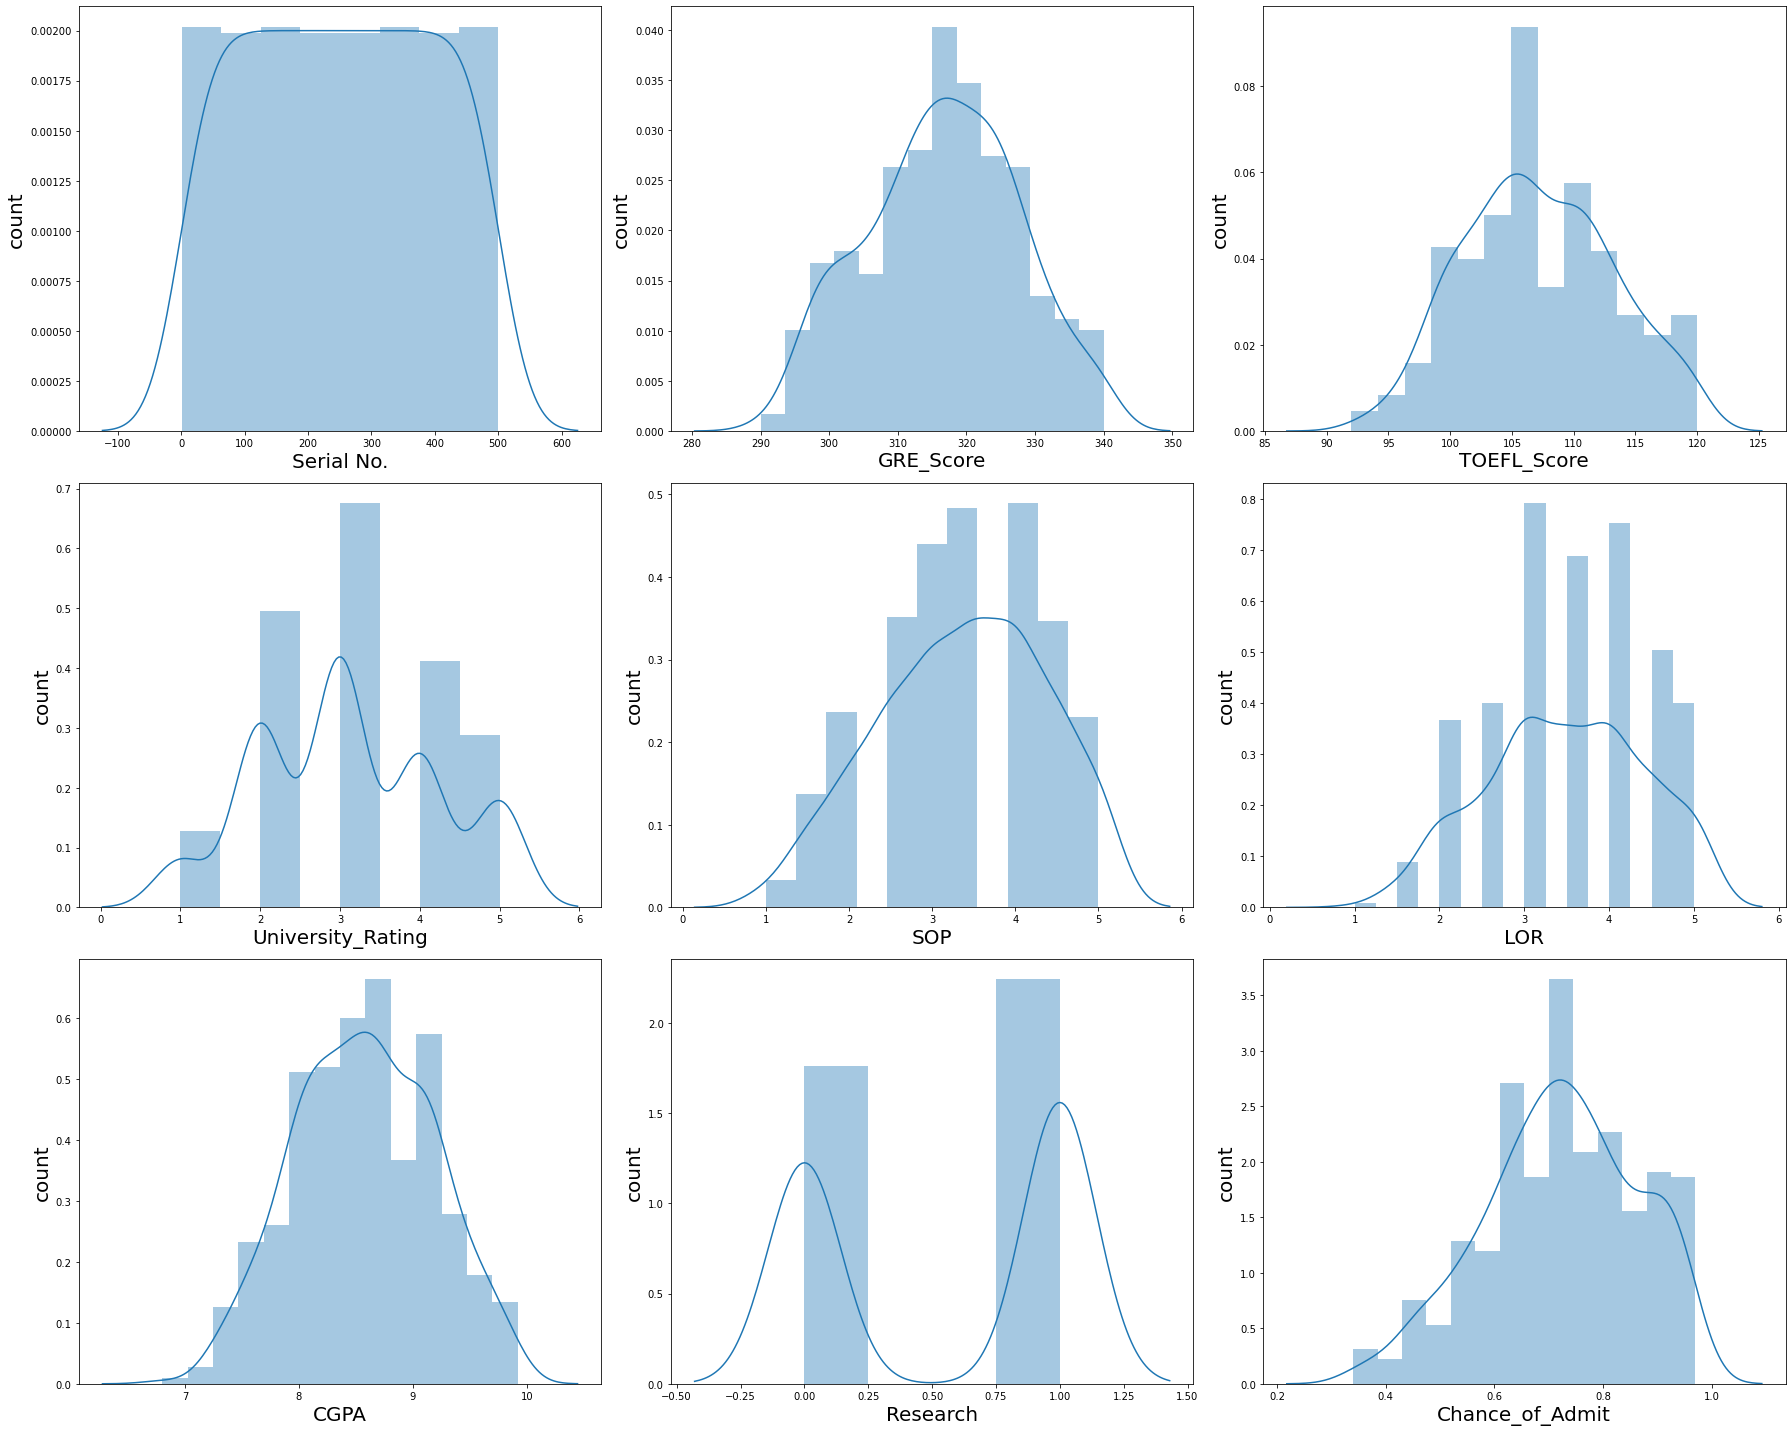

In [13]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

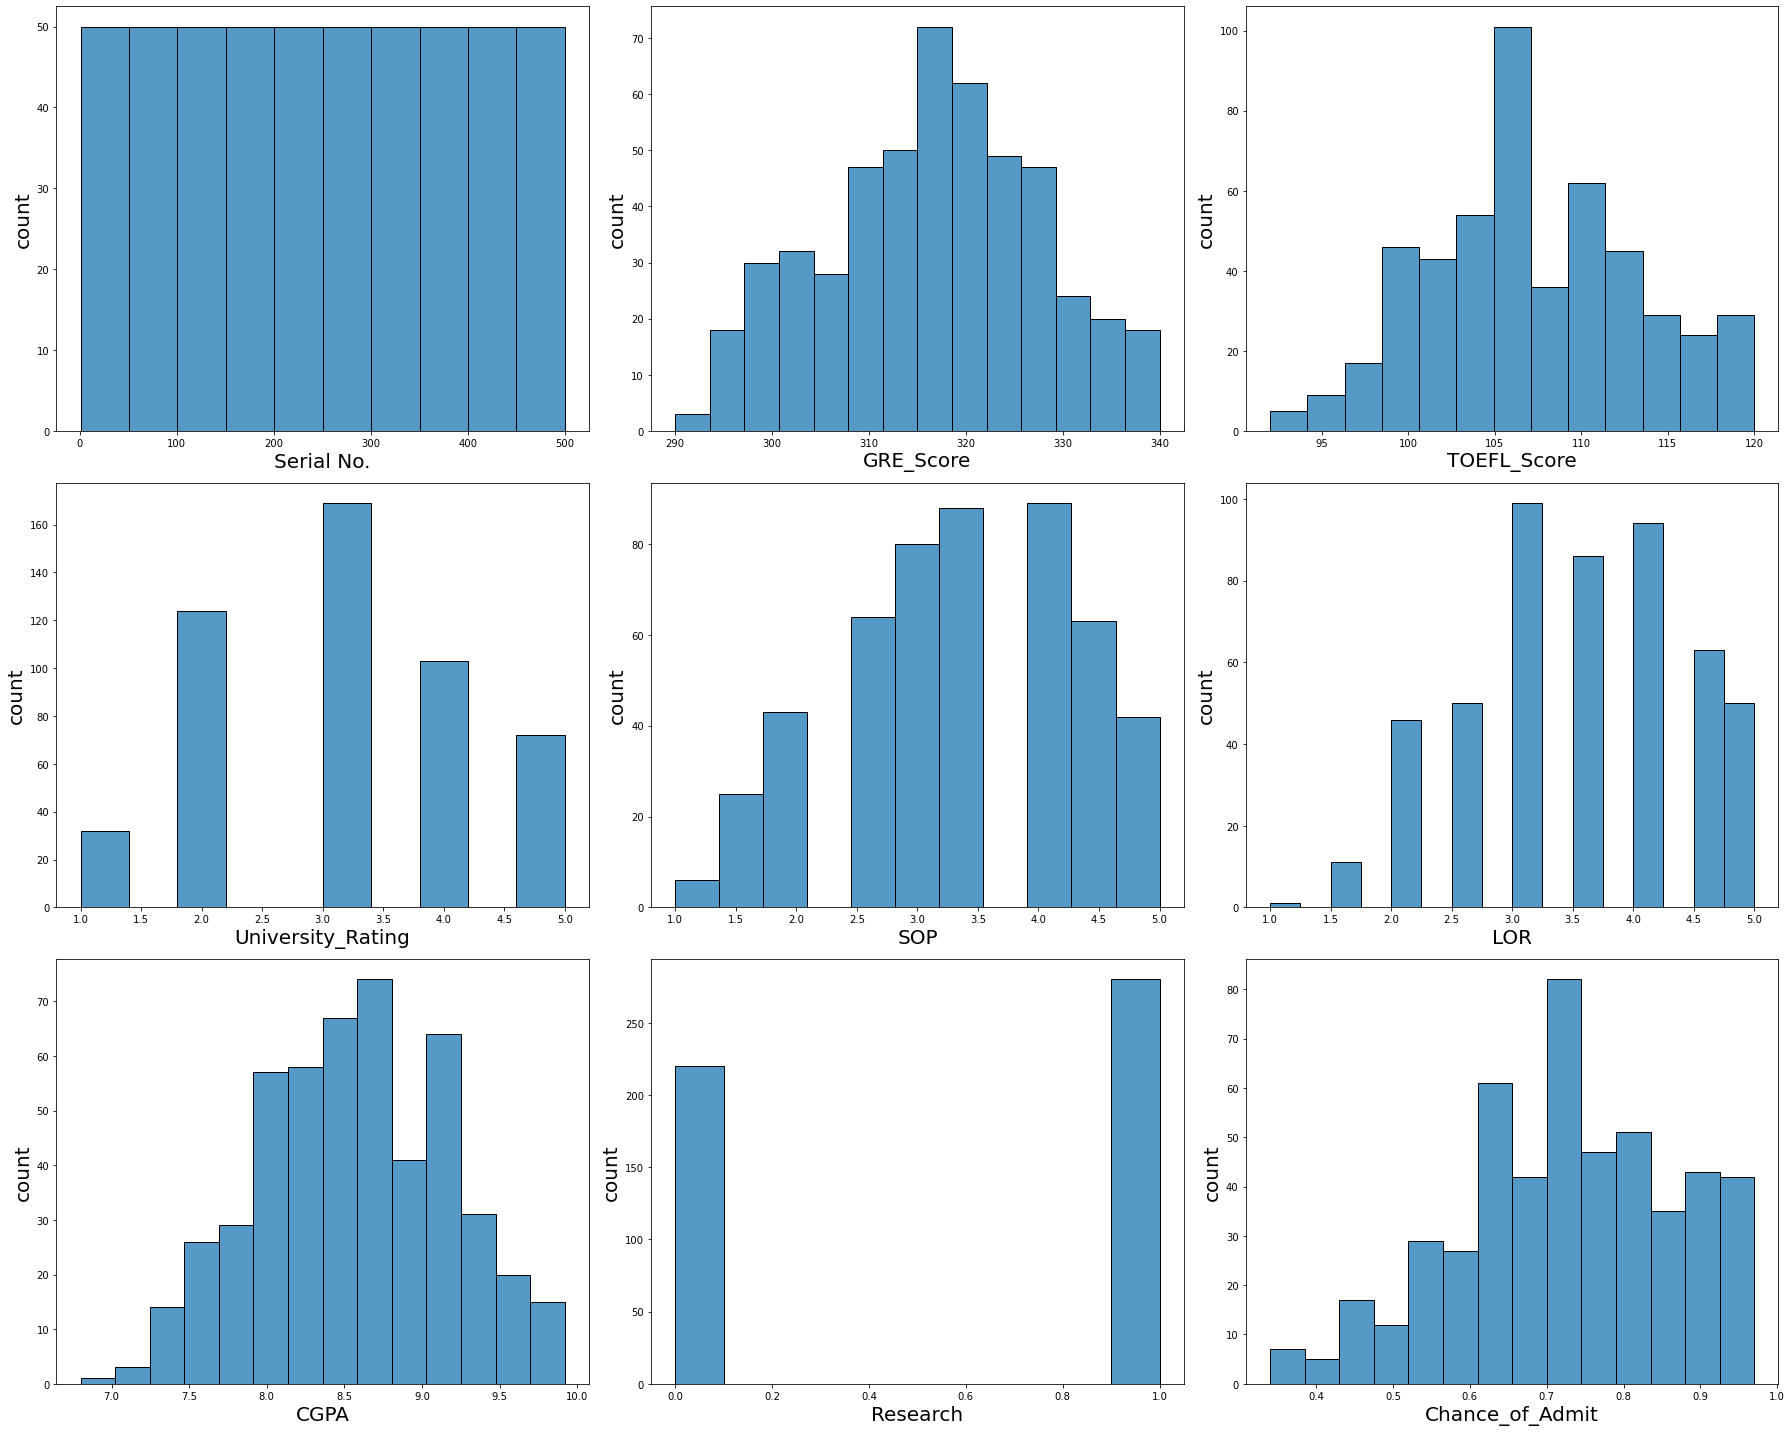

In [14]:
plt.figure(figsize=(25,20),facecolor="white")
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

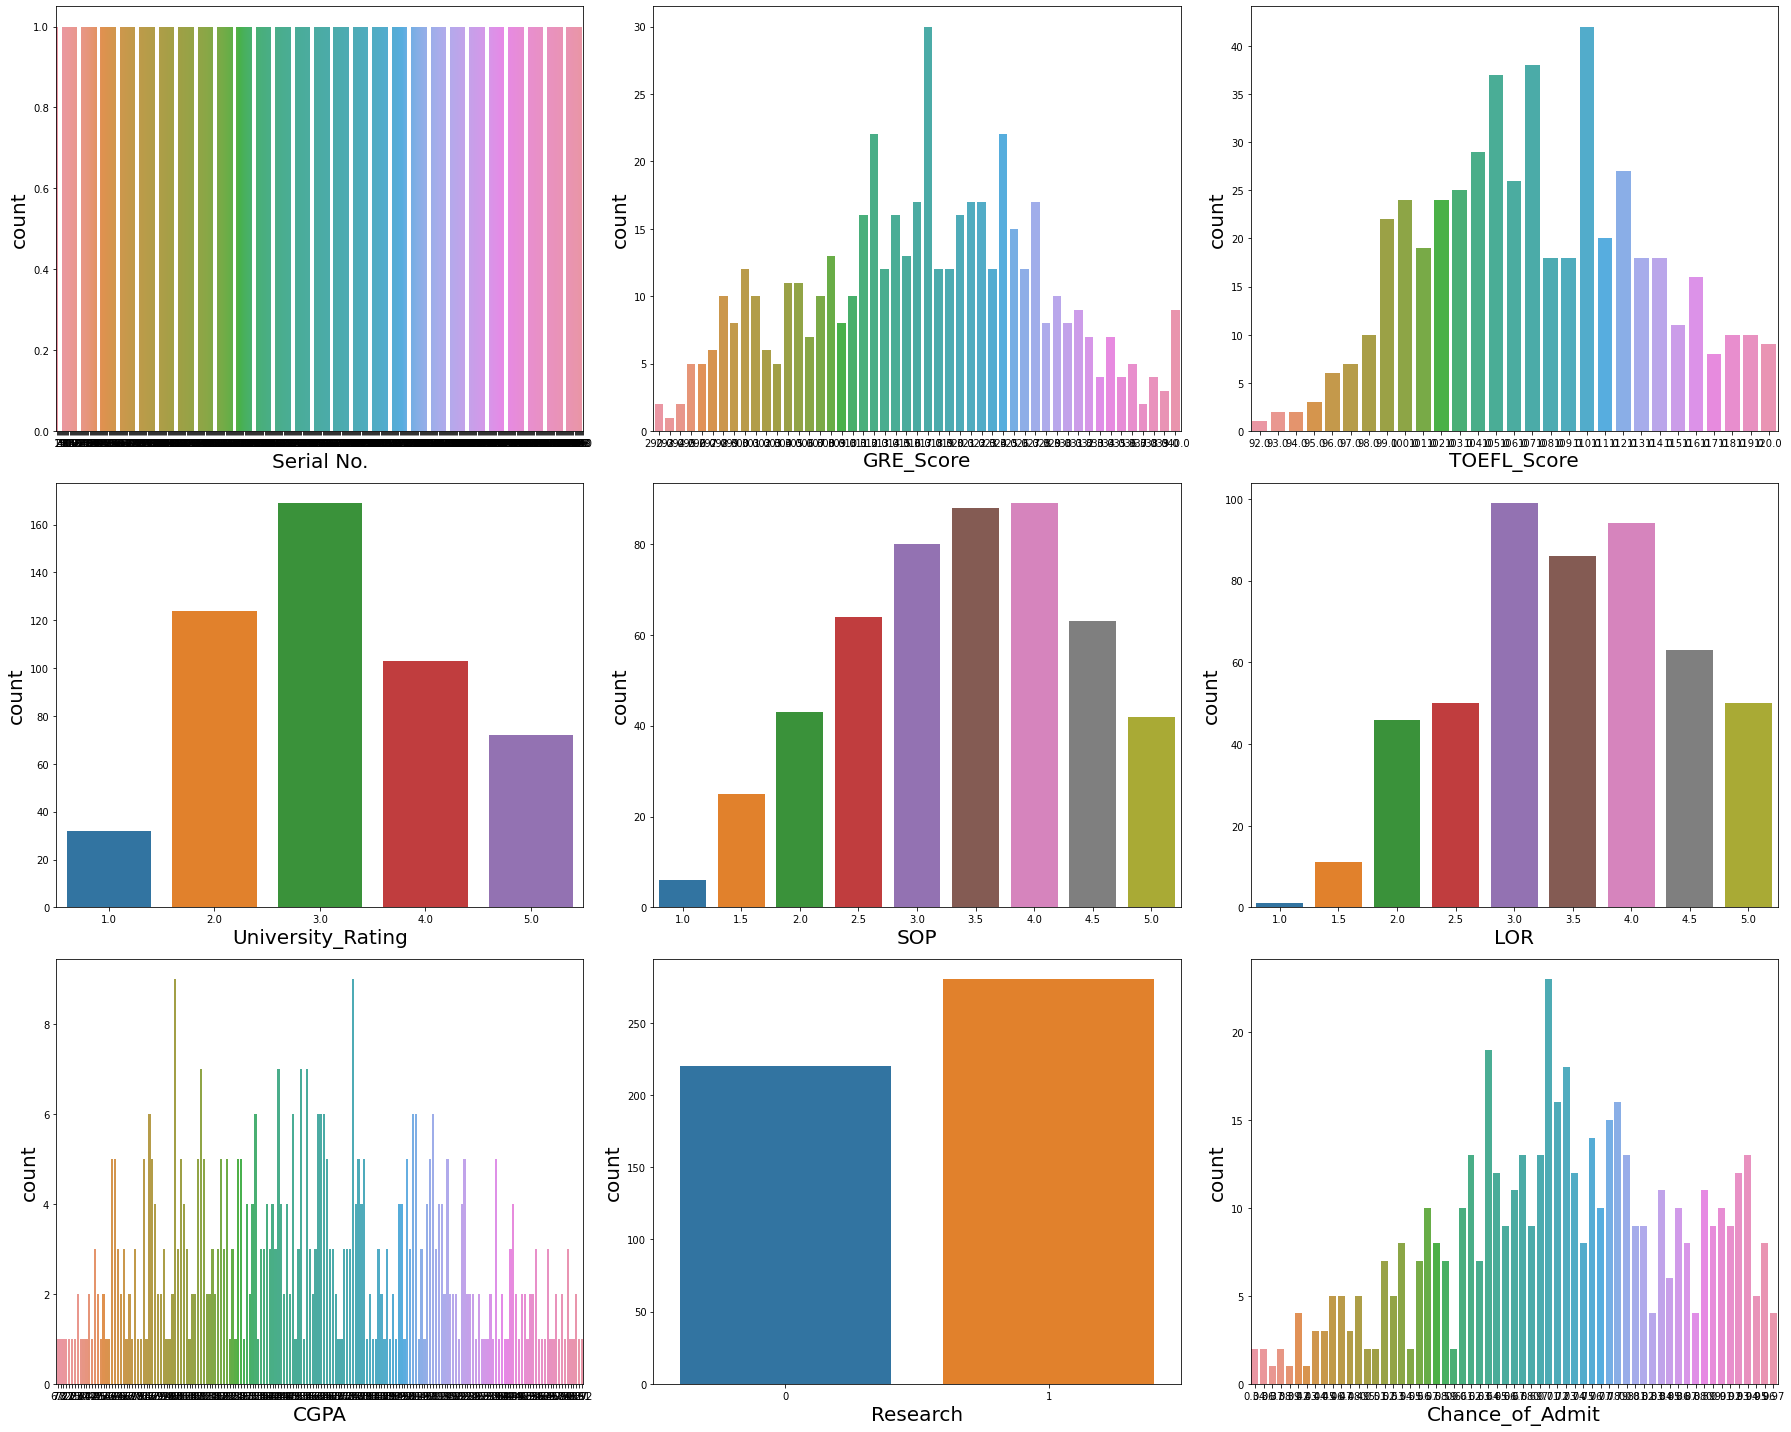

In [15]:
plt.figure(figsize=(25,20),facecolor="white")
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
corr=data.corr()
corr

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,1.000000,-0.097103,-0.139022,-0.050131,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.097103,1.000000,0.819885,0.623467,0.608349,0.528105,0.818344,0.544756,0.802321
TOEFL_Score,-0.139022,0.819885,1.000000,0.644189,0.642976,0.535500,0.805547,0.464858,0.786543
University_Rating,-0.050131,0.623467,0.644189,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,-0.137352,0.608349,0.642976,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.528105,0.535500,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.818344,0.805547,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.544756,0.464858,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.008505,0.802321,0.786543,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


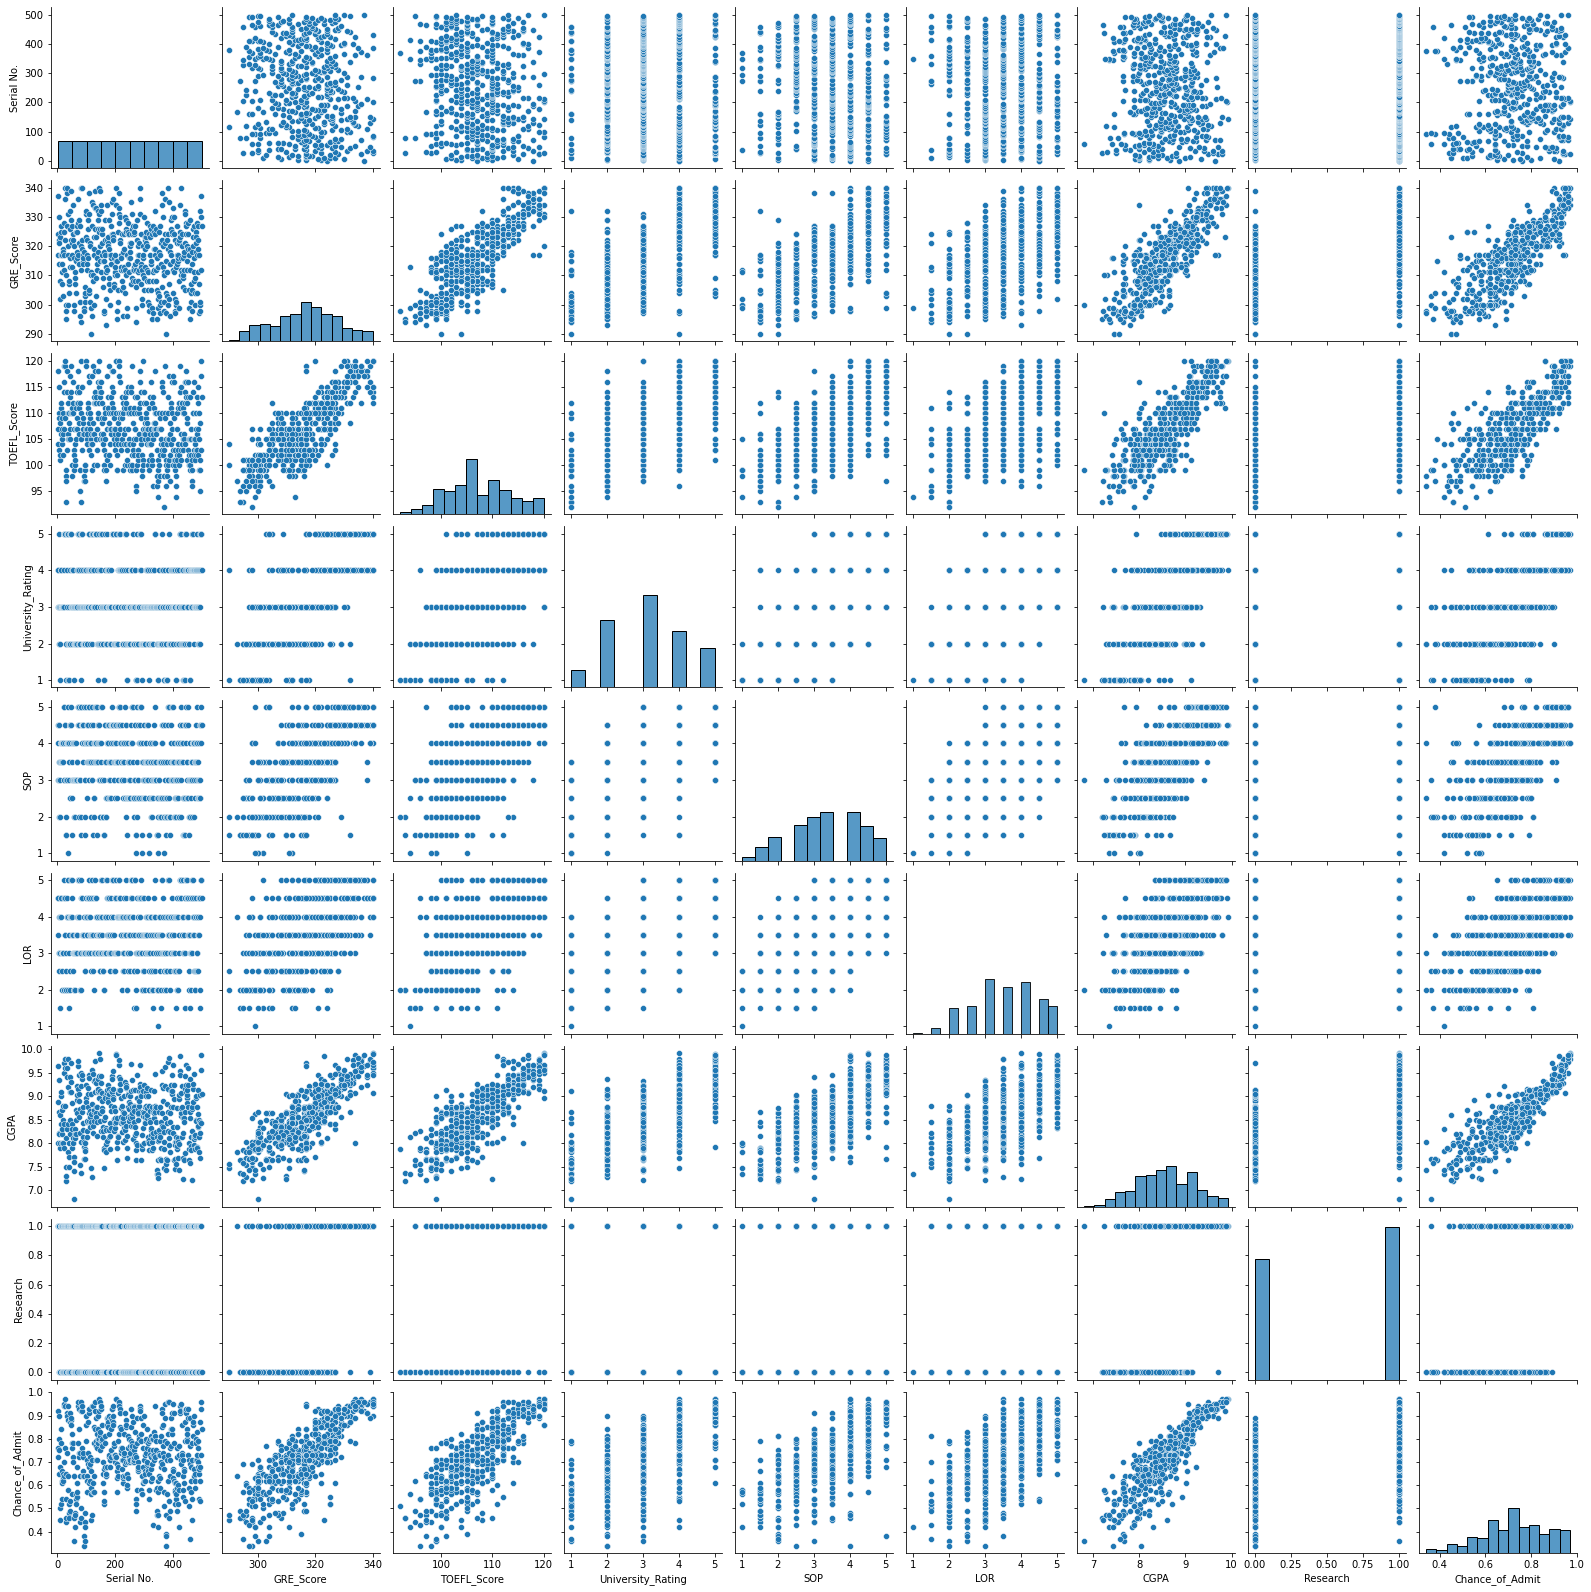

In [17]:
sns.pairplot(data)

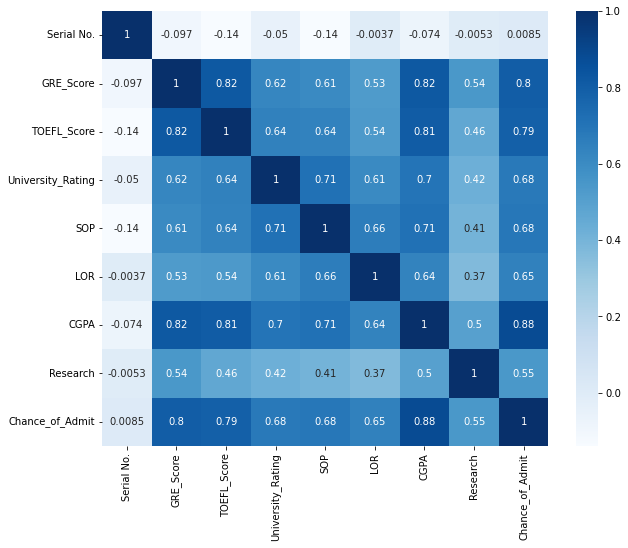

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

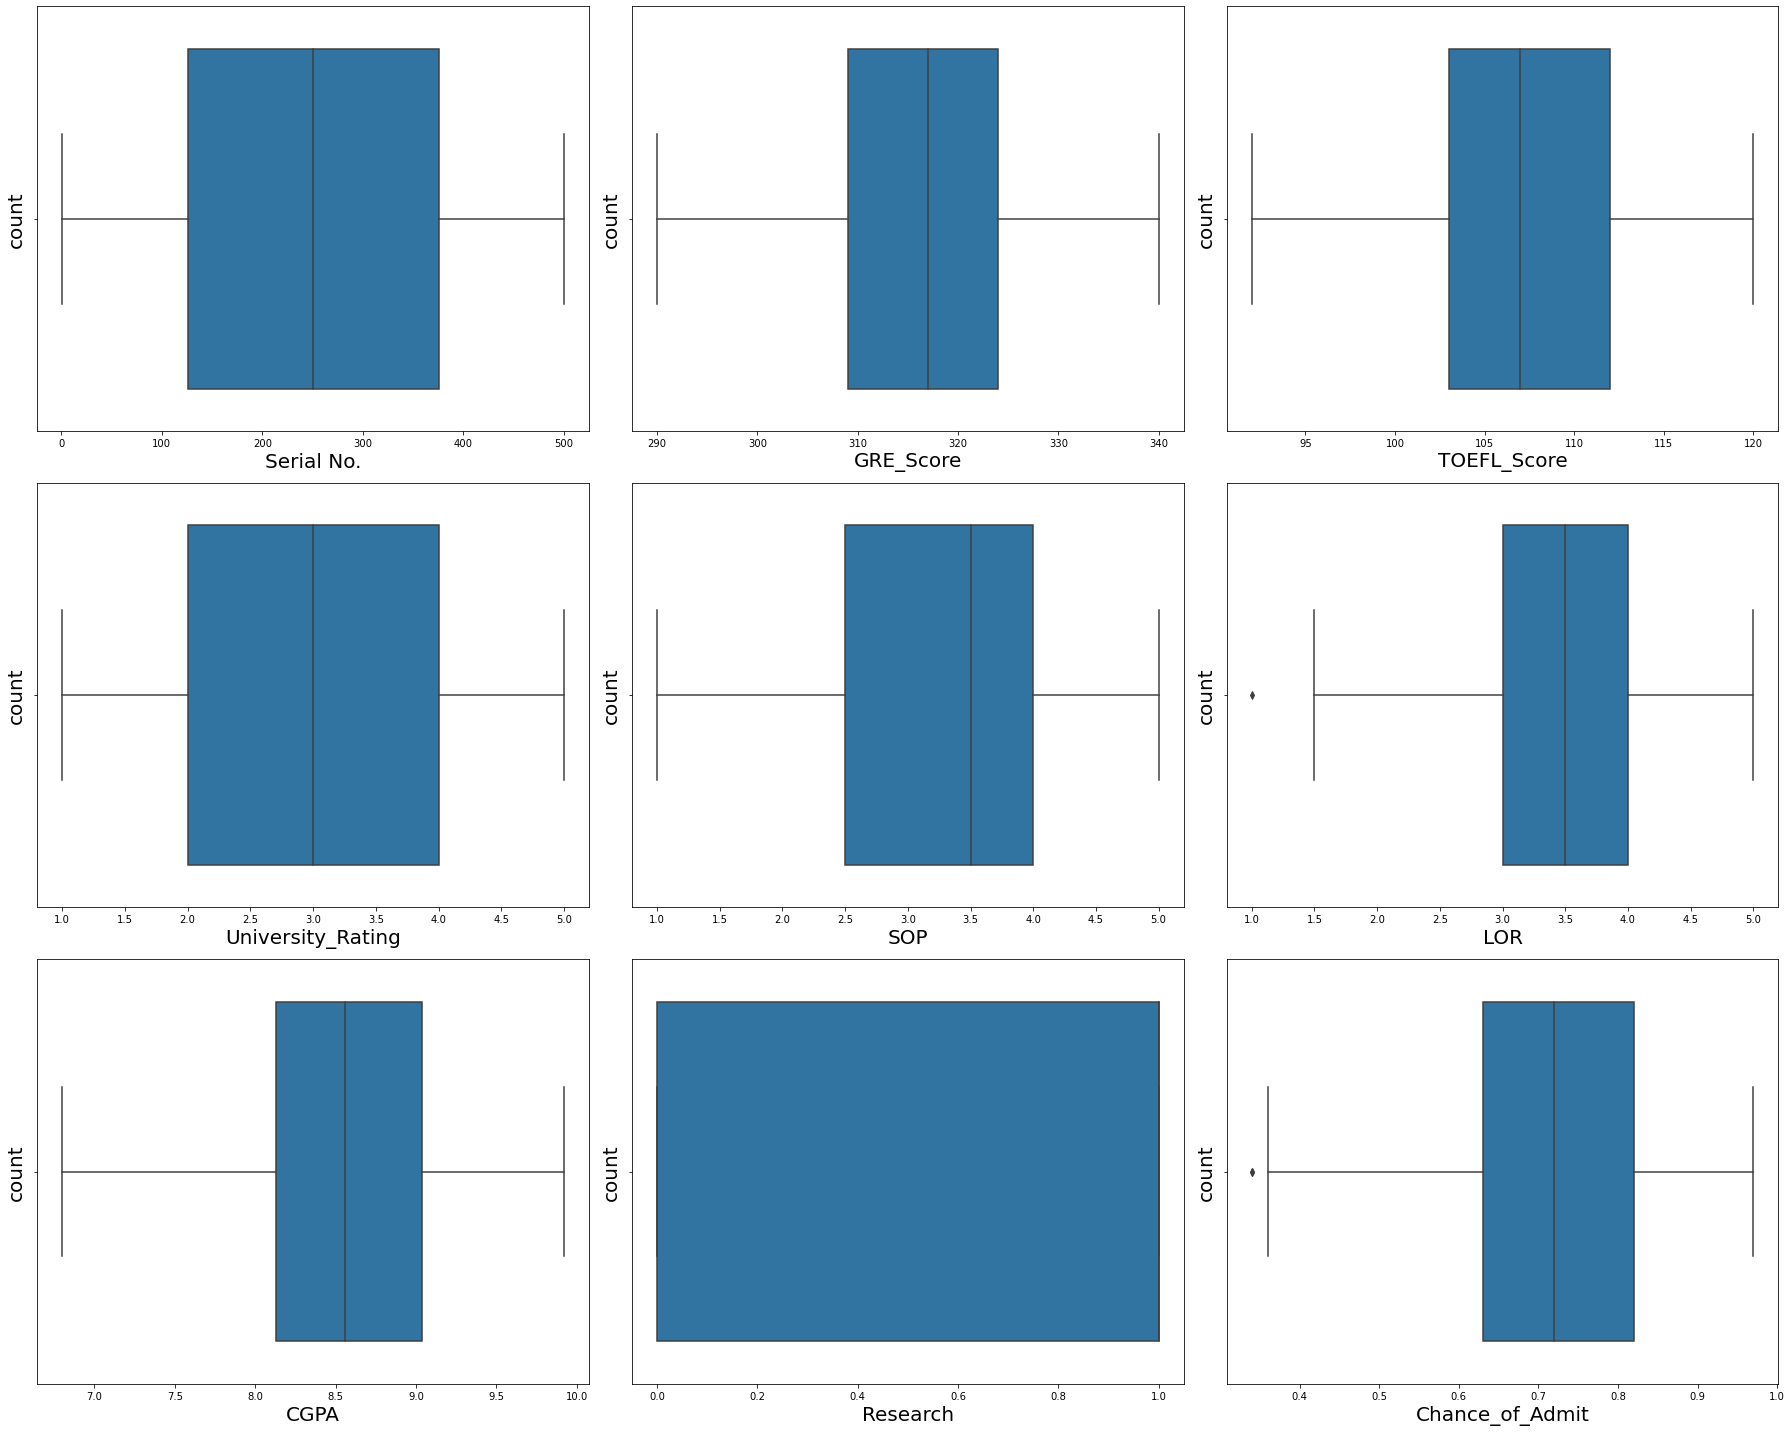

In [19]:
plt.figure(figsize=(25,20),facecolor="white")
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
# we identified an outlier available in LOR
def remove_outlier_LOR(data):
    IQR = data['LOR'].quantile(0.75) - data['LOR'].quantile(0.25)
    
    lower_range = data['LOR'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['LOR'].quantile(0.75) + (1.5 * IQR)
    
    data.loc[data['LOR'] <= lower_range, 'LOR'] = lower_range
    data.loc[data['LOR'] >= upper_range, 'LOR'] = upper_range

In [21]:
remove_outlier_LOR(data)

<AxesSubplot:xlabel='LOR'>

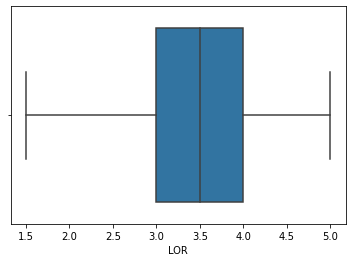

In [22]:
sns.boxplot(data['LOR'])

In [23]:
X=data.drop('Chance_of_Admit',axis=1)
y=data['Chance_of_Admit']

# Evaluating the model we trained

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)

In [26]:
train_error_lr=lr.score(X_train,y_train)
test_error_lr=lr.score(X_test,y_test)
print("Training Error is",train_error_lr)
print("Test Error is",test_error_lr)

Training Error is 0.83614494572195
Test Error is 0.787160277070591


In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [28]:
print("Mean Absolute Error :",mean_absolute_error(y_test,y_predict))
print("Mean Squared Error :",mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_predict)))
print("Mean Absolute Percentage Error :",mean_absolute_percentage_error(y_test,y_predict))

Mean Absolute Error : 0.04760298046369091
Mean Squared Error : 0.004056033389935015
Root Mean Squared Error : 0.06368699545382099
Mean Absolute Percentage Error : 0.07501497384331934
